## An Example of Feature Transformation Pipeline 


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import copy

In [2]:
flights = pd.read_csv('flights_short.csv')
flights.shape

(500, 16)

In [3]:
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [4]:
from sklearn.base import TransformerMixin, BaseEstimator, clone

class SelectColumnsTransfomer(BaseEstimator, TransformerMixin):
    # A DataFrame transformer that allows to select columns by name from pandas dataframes 
        
    def __init__(self, columns=[]):
        # columns : list of str, names of the dataframe columns to select; Default is [] 
        self.columns = columns 

    def transform(self, X, **transform_params):
        # Returns pandas DataFrame contains selected columns of X      
        return X[self.columns].copy()

    def fit(self, X, y=None, **fit_params):
        # Do nothing function
        return self
    

In [5]:
from sklearn.pipeline import Pipeline, make_pipeline
pipeline_one = make_pipeline(  
        SelectColumnsTransfomer(['dep_delay', 'arr_delay','flight']),
)

In [6]:
pipeline_one.fit_transform(flights)

,dep_delay,arr_delay,flight
0,96.0,70.0,145
1,-6.0,-23.0,1830
2,13.0,-4.0,1609
3,-2.0,-23.0,466
4,44.0,43.0,121
5,82.0,88.0,1823
6,227.0,219.0,1481
7,-4.0,15.0,229
8,7.0,24.0,1576
9,1.0,-6.0,478


In [7]:
flights.isnull().sum()

year          0
month         0
day           0
dep_time     11
dep_delay    11
arr_time     12
arr_delay    14
carrier       0
tailnum       3
flight        0
origin        0
dest          0
air_time     14
distance      0
hour         11
minute       11
dtype: int64

In [8]:
from sklearn.preprocessing import Imputer

pipeline_two = make_pipeline(  
        SelectColumnsTransfomer(['dep_delay', 'arr_delay']),
        Imputer(strategy="median")
)

In [9]:
pipeline_two.fit_transform(flights)

array([[ 96.,  70.],
       [ -6., -23.],
       [ 13.,  -4.],
       [ -2., -23.],
       [ 44.,  43.],
       [ 82.,  88.],
       [227., 219.],
       [ -4.,  15.],
       [  7.,  24.],
       [  1.,  -6.],
       [  1.,   4.],
       [ 24.,  12.],
       [  0., -12.],
       [ -3., -16.],
       [ -3., -25.],
       [ -2.,  -2.],
       [ -1.,  -9.],
       [  0., -19.],
       [-10.,  -8.],
       [ -3.,   5.],
       [ -3.,   7.],
       [ -2., -17.],
       [ -3.,  -2.],
       [ -4., -19.],
       [  6.,   3.],
       [ -1.,  -2.],
       [  2., -12.],
       [ -2., -30.],
       [ -6.,  -7.],
       [ -2.,   0.],
       [  2., -19.],
       [ 13.,  -4.],
       [ -6.,  -6.],
       [ -9.,  -1.],
       [-10., -14.],
       [ -3.,   5.],
       [ -8.,  -7.],
       [ -3.,  -6.],
       [ -2.,  -5.],
       [ 10.,  -4.],
       [ -1.,   3.],
       [ -1., -10.],
       [  4., -11.],
       [ -3.,  -2.],
       [ -3.,  19.],
       [ -7.,  -9.],
       [-12., -11.],
       [ 90.,

In [10]:
# document in Numpydoc
class DataFrameFunctionTransformer(BaseEstimator, TransformerMixin):
    """ A DataFrame transformer providing imputation or function application
    
    Parameters
    ----------
    impute : Boolean, default False
        
    func : function that acts on an array of the form [n_elements, 1]
        if impute is True, functions must return a float number, otherwise 
        an array of the form [n_elements, 1]
    
    """
    def __init__(self, func, impute = False):
        self.func = func
        self.impute = impute
        self.series = pd.Series() 

    def transform(self, X, **transformparams):
        """ Transforms a DataFrame
        
        Parameters
        ----------
        X : DataFrame
            
        Returns
        ----------
        trans : pandas DataFrame
            Transformation of X 
        """
        
        if self.impute:
            trans = pd.DataFrame(X).fillna(self.series).copy()
        else:
            trans = pd.DataFrame(X).apply(self.func).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Fixes the values to impute or does nothing
        
        Parameters
        ----------
        X : pandas DataFrame
        y : not used, API requirement
                
        Returns
        ----------
        self  
        """
        
        if self.impute:
            self.series = pd.DataFrame(X).apply(self.func).copy()
        return self

In [11]:
pipeline_three = make_pipeline(  
        SelectColumnsTransfomer(['dep_delay', 'arr_delay']),
        DataFrameFunctionTransformer(func = np.mean, impute=True),
)

In [12]:
new_flights = pipeline_three.fit_transform(flights)
new_flights.head()

,dep_delay,arr_delay
0,96.0,70.0
1,-6.0,-23.0
2,13.0,-4.0
3,-2.0,-23.0
4,44.0,43.0


In [13]:
new_flights.isnull().sum()

dep_delay    0
arr_delay    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F3F848668>,
      dtype=object)

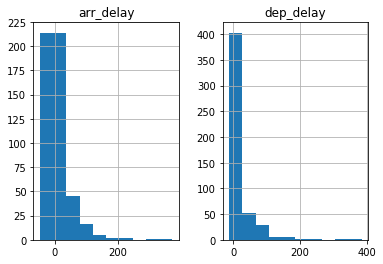

In [14]:
new_flights.hist()

In [15]:
from sklearn.preprocessing import StandardScaler

pipeline_four = make_pipeline(  
        SelectColumnsTransfomer(['dep_delay', 'arr_delay']),
        DataFrameFunctionTransformer(func = np.mean, impute=True),
        StandardScaler(),
)

In [16]:
new_scaled_flights = pipeline_four.fit_transform(flights)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F3FB93C88>,
      dtype=object)

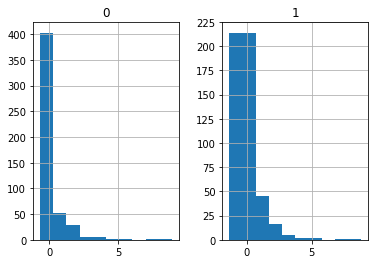

In [17]:
new_scaled_flights_pd = pd.DataFrame(new_scaled_flights)
new_scaled_flights_pd.hist()